In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
def lrs(x,y):
    x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score: "+ str(accuracy_score(y_pred,y_test)))
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print("Precision score:" , precision_score(y_pred, y_test))
    print('Recall score:' ,recall_score(y_pred, y_test))
    print('G-mean score:',geometric_mean_score(y_pred, y_test))
    print('Fl score:', f1_score(y_pred, y_test))
    logit_roc_auc=roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds =roc_curve(y_test, model.predict_proba(x_test)[ :,1])
    plt.figure()
    plt.plot(fpr, tpr, label="AUC= %0.2f" % auc(fpr, tpr))
    plt.plot ([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [3]:
train = pd.read_csv("train.csv")
train = train.dropna(axis=0)
x = train[['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 
'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 
'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_03_cat', 'ps_car_07_cat', 'ps_car_11', 
'ps_car_12', 'ps_car_13', 'ps_car_15']]
y = train.target

Without Sampling

C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9631896686902175
[[171991      0]
 [  6573      0]]
Precision score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


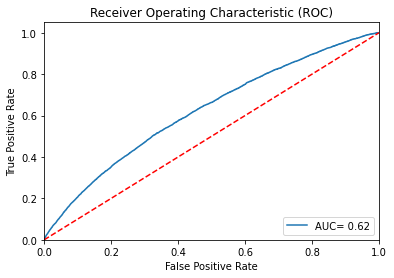

In [4]:
lrs(x,y)

Random Under Sampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler()
x_resampled_rus, y_resampled_rus = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled_rus).items()))

[(0, 21694), (1, 21694)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.5861565644925866
[[4116 2434]
 [2953 3514]]
Precision score: 0.543374052883872
Recall score: 0.5907868190988568
G-mean score: 0.5865082033528699
Fl score: 0.5660894079742247


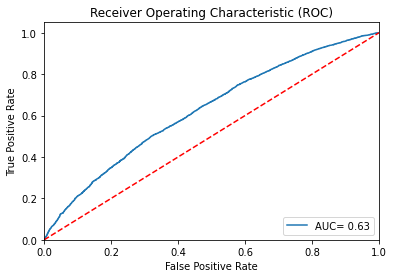

In [6]:
lrs(x_resampled_rus,y_resampled_rus)

Tomek Link

In [7]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks()
x_resampled_tl, y_resampled_tl = tl.fit_resample(x, y)
print(sorted(Counter(y_resampled_tl).items()))

[(0, 563777), (1, 21694)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9629701324284624
[[169138      0]
 [  6504      0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


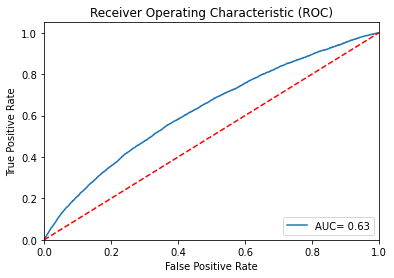

In [8]:
lrs(x_resampled_tl,y_resampled_tl)

Edited Nearest Neighbors (ENN)

In [9]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
x_resampled_enn, y_resampled_enn = enn.fit_resample(x,y)
print(sorted(Counter(y_resampled_enn).items()))

[(0, 516426), (1, 21694)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9603062513937412
[[155027      0]
 [  6408      1]]
Precision score: 0.00015603058199407084
Recall score: 1.0
G-mean score: 0.9799520424556779
Fl score: 0.00031201248049921997


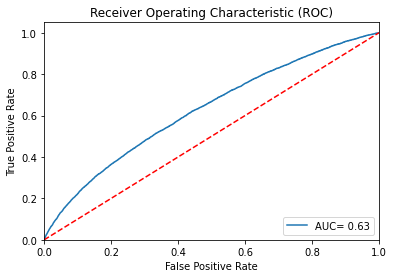

In [10]:
lrs(x_resampled_enn,y_resampled_enn)

Random Oversampling

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled_ros, y_resampled_ros = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled_ros).items()))

[(0, 573518), (1, 573518)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.5879672547521003
[[108150  64090]
 [ 77695  94176]]
Precision score: 0.5479458431032577
Recall score: 0.5950488418232596
G-mean score: 0.5884561802414725
Fl score: 0.5705267813059427


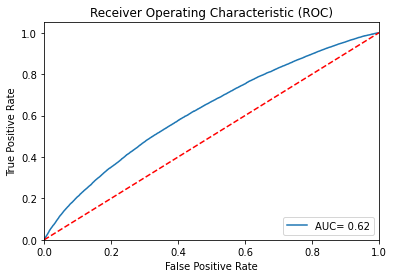

In [13]:
lrs(x_resampled_ros,y_resampled_ros)

Synthetic Minority Oversampling Technique (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_resampled_sm, y_resampled_sm = sm.fit_resample(x,y)
print(sorted(Counter(y_resampled_sm).items()))

[(0, 573518), (1, 573518)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6460967536637887
[[126454  45568]
 [ 76214  95875]]
Precision score: 0.5571245111541121
Recall score: 0.677834887551876
G-mean score: 0.6503327929450818
Fl score: 0.6115803171606089


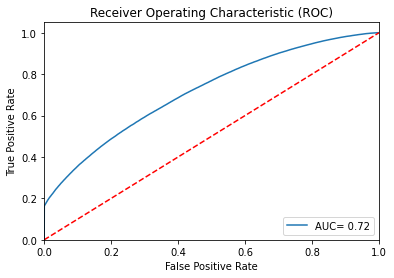

In [15]:
lrs(x_resampled_sm,y_resampled_sm)

Adaptive Synthetic Sampling (ADASYN)

In [16]:
from imblearn.over_sampling import ADASYN
ad = ADASYN()
x_resampled_ad, y_resampled_ad = ad.fit_resample(x,y)
print(sorted(Counter(y_resampled_ad).items()))

[(0, 573518), (1, 578502)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6436983154227647
[[124901  47060]
 [ 76080  97565]]
Precision score: 0.5618647240058741
Recall score: 0.6746067415730337
G-mean score: 0.6474866147356277
Fl score: 0.6130957991642316


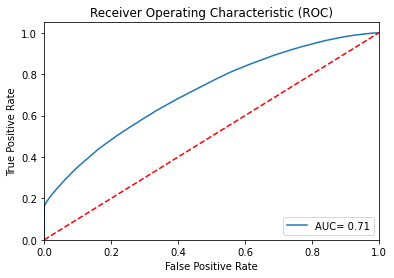

In [17]:
lrs(x_resampled_ad,y_resampled_ad)

Hybrid 1

In [18]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
x_resampled_smen, y_resampled_smen = smote_enn.fit_resample(x, y)
print(sorted(Counter(y_resampled_smen).items()))

[(0, 456186), (1, 568057)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6584958652403563
[[ 84292  52777]
 [ 52158 118046]]
Precision score: 0.6935559681323589
Recall score: 0.691042775270309
G-mean score: 0.6533695261708551
Fl score: 0.6922970908461793


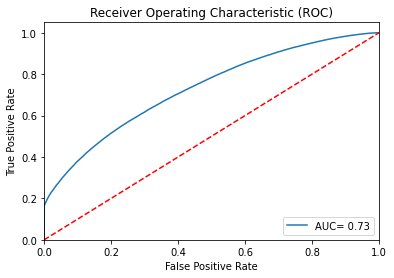

In [19]:
lrs(x_resampled_smen, y_resampled_smen)

Hybrid 2

In [20]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek()
x_resampled_smtm, y_resampled_smtm = smote_tomek.fit_resample(x, y)
print(sorted(Counter(y_resampled_smtm).items()))

[(0, 573241), (1, 573241)]


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6457166116675631
[[125674  46081]
 [ 75773  96417]]
Precision score: 0.559945409141065
Recall score: 0.6766200227371613
G-mean score: 0.6497028019369231
Fl score: 0.6127783709579012


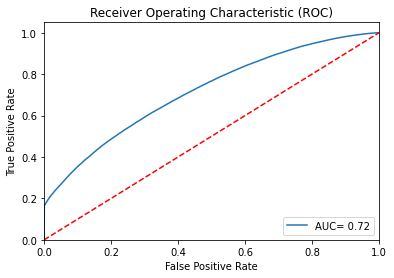

In [21]:
lrs(x_resampled_smtm, y_resampled_smtm)